<>:119: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:223: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:225: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:227: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:229: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:231: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:233: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:235: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:119: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:223: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:225: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:227: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:229: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:231: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:233: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:235: SyntaxWarning: "is" with a literal. Did you mea

[np.float64(9.894448138297872), np.float64(9.895548404397962), np.float64(9.896587816621311), np.float64(9.898239254272397), np.float64(9.897356024920224), np.float64(9.897811784897025), np.float64(9.897423465853997)]
[np.float64(9.728654727197002), np.float64(9.7416142557652), np.float64(9.75339053418212), np.float64(9.768792955326461), np.float64(9.763711960368012), np.float64(9.73936088492856), np.float64(9.7)]
[np.float64(76.30801196808511), np.float64(77.07736658621614), np.float64(77.82342474356291), np.float64(78.33402382185396), np.float64(78.42721470901078), np.float64(78.59811212814645), np.float64(78.36611719074664)]
[np.float64(54.9356518117451), np.float64(56.53197064989518), np.float64(58.01162468862441), np.float64(59.23765034364261), np.float64(58.97328379334749), np.float64(57.78260869565217), np.float64(55.86343859649123)]
[390. 416. 442. 468. 494. 520. 546.]
the gain of fa_cut_df for service_blocking_rate over av_bm_fa_rss_df is 0.11985335641242056
the gain of fa_cut

/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_92903/3921336058.py:119: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if info is 'service_blocking_rate':
/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_92903/3921336058.py:223: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if info is 'total_path_length':
/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_92903/3921336058.py:225: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif info is 'service_blocking_rate':
/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_92903/3921336058.py:227: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif info is 'rss_total_metric':
/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_92903/3921336058.py:229: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif info is 'avrage_gsnr':
/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_92903/3921336058.py:231: SyntaxWarning: "is" with a literal. Did you 

 number_cuts_total is 3.615857276362146
 number_cuts_total is 3.79585956046233
the gain of fa_cut_df for number_cuts_total over av_bm_fa_rss_df is -0.04978135759862765
the gain of fa_cut_df number_cuts_total over fa_cut is 0.12259686491562179
the gain of fa_cut_df number_cuts_total over av_sap_bm is 0.22494489008930638
the gain of fa_cut_df number_cuts_total over av_bm_sa is 0.2182776914126064
the gain of av_bm_fa_cut number_cuts_total over av_sap_bm is 0.11664880267819193
the gain of av_bm_fa_cut number_cuts_total over av_bm_sa is 0.10905001665828692
the gain of av_bm_fa_rss number_cuts_total over av_bm_sa is 0.13102816903313813
the gain of av_bm_fa_cut number_cuts_total over av_bm_fa_rss is -0.0252921344416852
 rss_total_metric is 0.569608855257167
 rss_total_metric is 0.4988413057201489
the gain of fa_cut_df for rss_total_metric over av_bm_fa_rss_df is 0.12423885071988207
the gain of fa_cut_df rss_total_metric over fa_cut is -0.0817685794594891
the gain of fa_cut_df rss_total_metric

/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_92903/3921336058.py:176: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"the gain of fa_cut_df {info} over fa_cut is {(av_bm_fa_cut - av_bm_fa_cut_df)/av_bm_fa_cut}")
/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_92903/3921336058.py:177: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"the gain of fa_cut_df {info} over av_sap_bm is {(av_sap_bm - av_bm_fa_cut_df)/av_sap_bm}")
/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_92903/3921336058.py:178: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"the gain of fa_cut_df {info} over av_bm_sa is {(av_bm_sa - av_bm_fa_cut_df)/av_bm_sa}")
/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_92903/3921336058.py:180: RuntimeWarning: invalid value encountered in scalar divide
  print(f"the gain of av_bm_fa_cut {info} over av_sap_bm is {(av_sap_bm - av_bm_fa_cut)/av_sap_bm}")
/var/folders/gv/wwx54

 num_defrag_cycle is 9.896773555608684
 num_defrag_cycle is 9.742217902538195
the gain of fa_cut_df for num_defrag_cycle over av_bm_fa_rss_df is 0.015616771688476094
the gain of fa_cut_df num_defrag_cycle over fa_cut is -inf
the gain of fa_cut_df num_defrag_cycle over av_sap_bm is -inf
the gain of fa_cut_df num_defrag_cycle over av_bm_sa is -inf
the gain of av_bm_fa_cut num_defrag_cycle over av_sap_bm is nan
the gain of av_bm_fa_cut num_defrag_cycle over av_bm_sa is nan
the gain of av_bm_fa_rss num_defrag_cycle over av_bm_sa is nan
the gain of av_bm_fa_cut num_defrag_cycle over av_bm_fa_rss is nan
 num_moves_groom is 3.3007953814521094
 num_moves_groom is 3.3359784124754177
the gain of fa_cut_df for num_moves_groom over av_bm_fa_rss_df is -0.010658955481157502
the gain of fa_cut_df num_moves_groom over fa_cut is -inf
the gain of fa_cut_df num_moves_groom over av_sap_bm is -inf
the gain of fa_cut_df num_moves_groom over av_bm_sa is -inf
the gain of av_bm_fa_cut num_moves_groom over av_s

/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_92903/3921336058.py:176: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"the gain of fa_cut_df {info} over fa_cut is {(av_bm_fa_cut - av_bm_fa_cut_df)/av_bm_fa_cut}")
/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_92903/3921336058.py:177: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"the gain of fa_cut_df {info} over av_sap_bm is {(av_sap_bm - av_bm_fa_cut_df)/av_sap_bm}")
/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_92903/3921336058.py:178: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"the gain of fa_cut_df {info} over av_bm_sa is {(av_bm_sa - av_bm_fa_cut_df)/av_bm_sa}")
/var/folders/gv/wwx54pg167n49b11qvywyt_80000gn/T/ipykernel_92903/3921336058.py:180: RuntimeWarning: invalid value encountered in scalar divide
  print(f"the gain of av_bm_fa_cut {info} over av_sap_bm is {(av_sap_bm - av_bm_fa_cut)/av_sap_bm}")
/var/folders/gv/wwx54

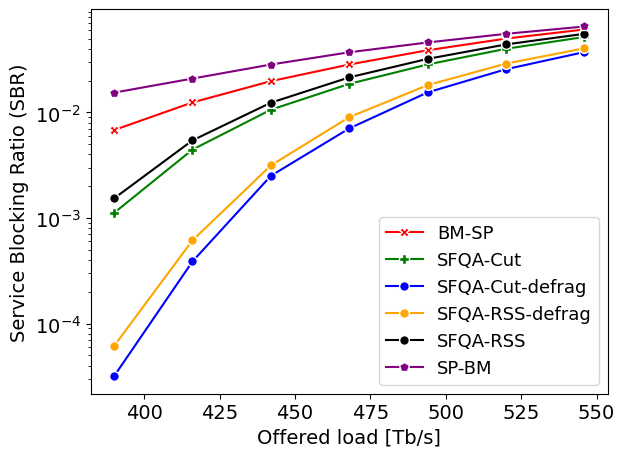

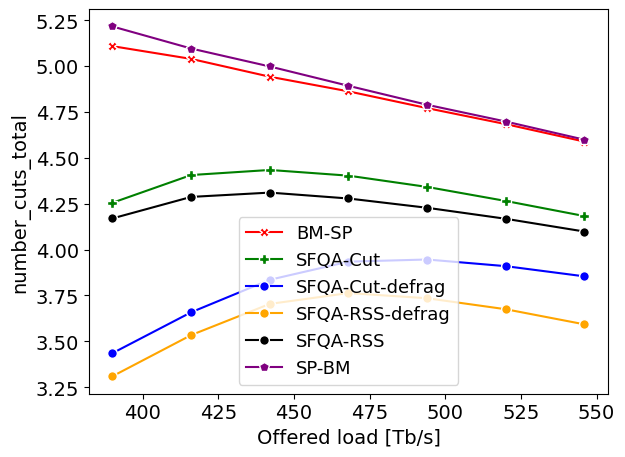

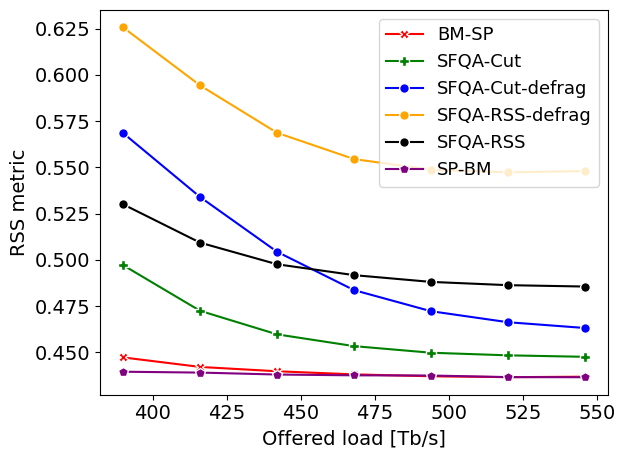

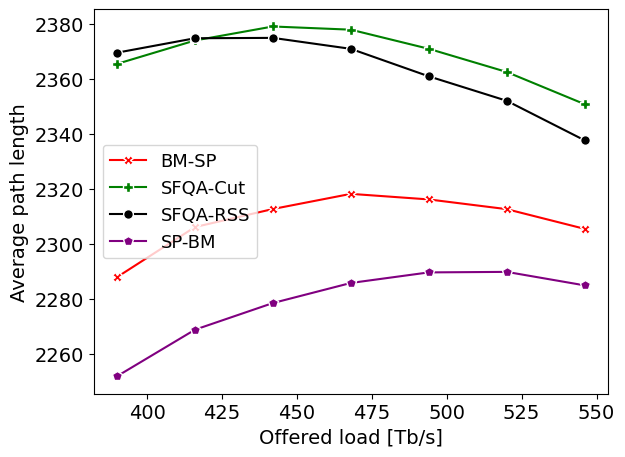

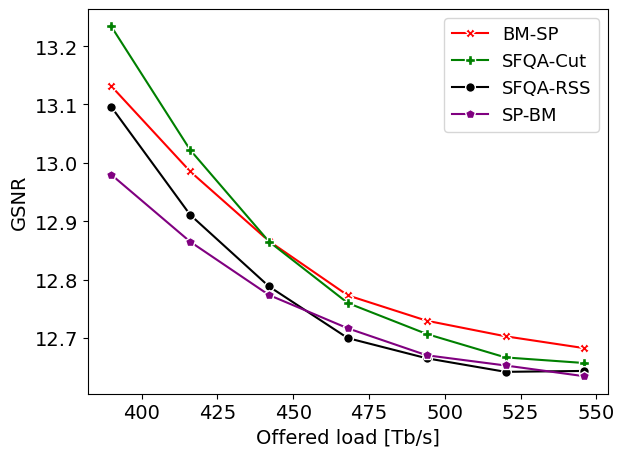

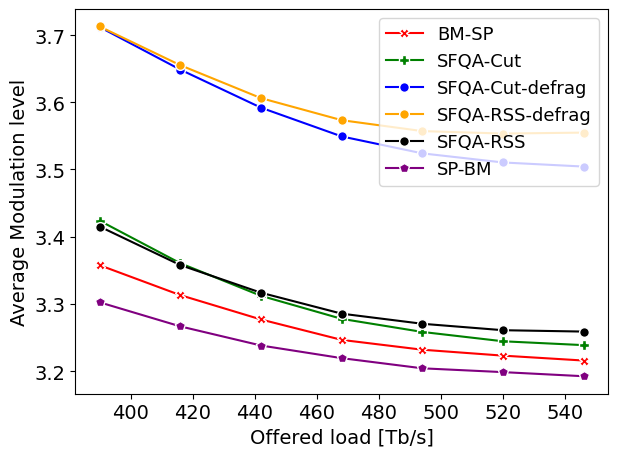

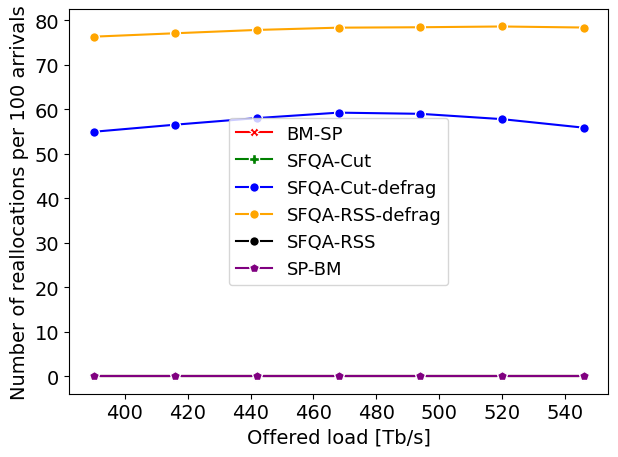

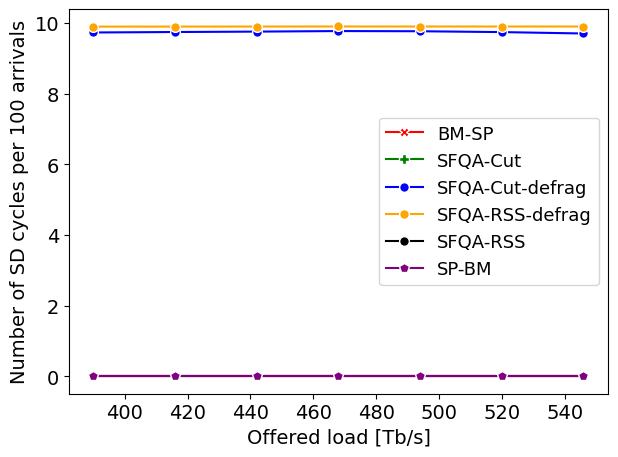

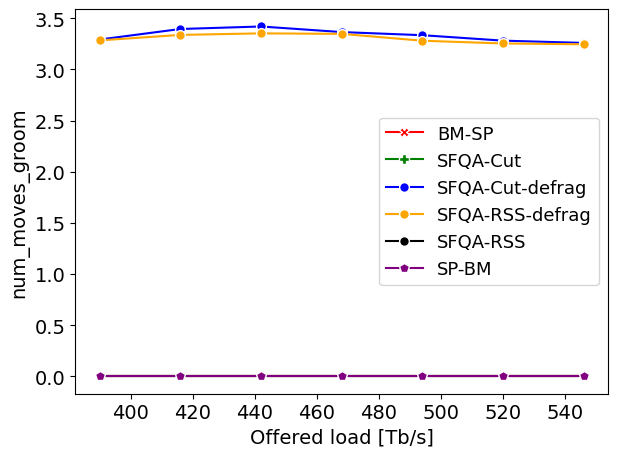

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
# from IPython.core.display import clear_output
import numpy as np
import time

heuristic_log_dir = 'phy_frag_rmsa2/us-results'

topology_name = 'Germany50'
topology_name = 'us14'
figures_floder = f'./{heuristic_log_dir}/figures'
os.makedirs(figures_floder, exist_ok=True)

min_load = 1200
max_load = 1701
step_length = 80
steps = int((max_load - min_load) / step_length) + 1
loads = np.zeros(steps)
episode_length = 200

metrics = [
    'episode_service_blocking_rate',
    'service_blocking_rate',
    'episode_bit_rate_blocking_rate',
    'number_cuts_total',
    'rss_total_metric',
    'total_path_length',
    'avrage_gsnr',
    'average_mod_level',
        'num_moves', 
    'num_defrag_cycle', 
    'num_moves_groom'
    
]

sap_ff_loads = {metric: [] for metric in metrics}
sap_bm_loads = {metric: [] for metric in metrics}
bm_fa_cut_loads = {metric: [] for metric in metrics}
bm_fa_rss_loads = {metric: [] for metric in metrics}
bm_sa_ff_loads = {metric: [] for metric in metrics}
bm_fa_rss_df_loads = {metric: [] for metric in metrics}
bm_sa_ff_df_loads = {metric: [] for metric in metrics}
bm_fa_cut_df_cut_loads = {metric: [] for metric in metrics}
traffic_type = 1

for load_counter, load_traffic in enumerate(range(min_load, max_load, step_length)):
    bm_fa_cut = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-FA-Cut-modified.monitor.csv',
        skiprows=1)
    bm_fa_rss = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-FA-RSS.monitor.csv', skiprows=1)
    bm_sa_ff = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-SA-FF.monitor.csv',
        skiprows=1)
    # bm_sa_ff_df = pd.read_csv(
    #     f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}-defragmeentation/BM-SA-FF.monitor.csv',
    #     skiprows=1)
    bm_fa_rss_df = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}-defragmeentation-rss/BM-FA-RSS.monitor.csv', skiprows=1)
    bm_fa_cut_df_cut = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}-defragmeentation-cut/BM-FA-Cut-modified.monitor.csv', skiprows=1)
    # sap_ff = pd.read_csv(
    #     f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/SAP-FF.monitor.csv',
    #     skiprows=1)

    sap_bm = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_{episode_length}/BM-FA-SAPBM.monitor.csv',
        skiprows=1)
    loads[load_counter] = load_traffic
    for info in ['episode_service_blocking_rate','service_blocking_rate',
                'episode_bit_rate_blocking_rate', 'number_cuts_total', 'rss_total_metric',
                 'total_path_length', 'avrage_gsnr', 'average_mod_level','num_moves', 
    'num_defrag_cycle', 'num_moves_groom' ]:
        bm_fa_cut_loads[info].append(np.mean(bm_fa_cut[info]))
        #             exhuastic_highest_loads[info].append(np.mean(exhaustic_highest[info]))
        bm_fa_rss_loads[info].append(np.mean(bm_fa_rss[info]))
        bm_sa_ff_loads[info].append(np.mean(bm_sa_ff[info]))
        bm_fa_rss_df_loads[info].append(np.mean(bm_fa_rss_df[info]))
        # bm_sa_ff_df_loads[info].append(np.mean(bm_sa_ff_df[info]))
        # sap_ff_loads[info].append(np.mean(sap_ff[info]))
        sap_bm_loads[info].append(np.mean(sap_bm[info]))
        bm_fa_cut_df_cut_loads[info].append(np.mean(bm_fa_cut_df_cut[info]))

# print(loads)
# print(f"SBR for highest-first-fit is {highest_loads['service_blocking_per_hundred_arrivals']}")


# percentage = []
# percentage1 = []
# for i in range(len(no_df_loads['service_blocking_per_hundred_arrivals'])):
#     percentage.append((no_df_loads['service_blocking_per_hundred_arrivals'][i] -
#                        exhuastic_oldest_loads['service_blocking_per_hundred_arrivals'][i]) /
#                       no_df_loads['service_blocking_per_hundred_arrivals'][i])
# for i in range(len(no_df_loads['service_blocking_per_hundred_arrivals'])):
#     percentage1.append((oldest_loads['service_blocking_per_hundred_arrivals'][i] -
#                         exhuastic_oldest_loads['service_blocking_per_hundred_arrivals'][i]) /
#                        oldest_loads['service_blocking_per_hundred_arrivals'][i])

# print(f"the exhaustic vs. no df-{[round(item, 2) for item in percentage]}")
# print(f"the exhaustic vs. oldest-{[round(item, 2) for item in percentage1]}")

bm_fa_rss_df_loads['num_defrag_cycle']= [x / 2 for x in bm_fa_rss_df_loads['num_defrag_cycle']]
bm_fa_cut_df_cut_loads['num_defrag_cycle']= [x / 2 for x in bm_fa_cut_df_cut_loads['num_defrag_cycle']]
print(bm_fa_rss_df_loads['num_defrag_cycle'])
print(bm_fa_cut_df_cut_loads['num_defrag_cycle'])
print(bm_fa_rss_df_loads['num_moves'])
print(bm_fa_cut_df_cut_loads['num_moves'])

markersize = 7
offered_load = loads*325*(0.001)
print(offered_load)
for info in ['service_blocking_rate',
                 'number_cuts_total', 'rss_total_metric',
                 'total_path_length','avrage_gsnr', 'average_mod_level', 'num_moves', 
    'num_defrag_cycle', 'num_moves_groom']:
    plt.figure()
    if info is 'service_blocking_rate':
        av_bm_sa = np.mean(bm_sa_ff_loads[info])
        av_bm_fa_cut = np.mean(bm_fa_cut_loads[info])
        av_bm_fa_rss = np.mean(bm_fa_rss_loads[info])
        av_sap_bm = np.mean(sap_bm_loads[info])
        av_bm_fa_cut_df = np.mean(bm_fa_cut_df_cut_loads[info])
        av_bm_fa_rss_df = np.mean(bm_fa_rss_df_loads[info])

        print(f"the gain of fa_cut_df for {info} over av_bm_fa_rss_df is {(av_bm_fa_rss_df - av_bm_fa_cut_df)/av_bm_fa_rss_df}")
        print(f"the gain of fa_cut_df {info} over fa_cut is {(av_bm_fa_cut - av_bm_fa_cut_df)/av_bm_fa_cut}")
        print(f"the gain of fa_cut_df {info} over av_sap_bm is {(av_sap_bm - av_bm_fa_cut_df)/av_sap_bm}")
        print(f"the gain of fa_cut_df {info} over av_bm_sa is {(av_bm_sa - av_bm_fa_cut_df)/av_bm_sa}")
        print(f"the gain of av_bm_fa_rss_df {info} over av_bm_sa is {(av_bm_sa - av_bm_fa_rss_df)/av_bm_sa}")

        
        print(f"the gain of av_bm_fa_cut {info} over av_sap_bm is {(av_sap_bm - av_bm_fa_cut)/av_sap_bm}")
        print(f"the gain of av_bm_fa_cut {info} over av_bm_sa is {(av_bm_sa - av_bm_fa_cut)/av_bm_sa}")
        print(f"the gain of av_bm_fa_cut {info} over av_bm_fa_rss is {(av_bm_fa_rss - av_bm_fa_cut)/av_bm_fa_rss}")

        print(f"the gain of fa_cut_df  {info} over av_bm_fa_cut is {(av_bm_fa_cut - av_bm_fa_cut_df)/av_bm_fa_cut}")
        print(f"the gain of av_bm_fa_rss_df  {info} over av_bm_fa_rss is {(av_bm_fa_rss - av_bm_fa_rss_df)/av_bm_fa_rss}")


        ax_bm_sa_ff = plt.semilogy(offered_load, bm_sa_ff_loads[info], label='BM-SP', marker='X', markersize=markersize,
                             markeredgecolor='white', color = 'red')

        # ax_bm_sa_ff_df = plt.semilogy(offered_load, bm_sa_ff_df_loads[info], label='BM-SP-defrag(rss)', marker='X', markersize=markersize,
        #                      markeredgecolor='white')

        ax_bm_fa_cut = plt.semilogy(offered_load, bm_fa_cut_loads[info], label='SFQA-Cut', marker='P', markersize=markersize,
                                 markeredgecolor='white', color = 'green')

        ax_bm_fa_cut_df = plt.semilogy(offered_load, bm_fa_cut_df_cut_loads[info], label='SFQA-Cut-defrag', marker='o',
                                           markersize=markersize, markeredgecolor='white', color = 'blue')
        ax_bm_fa_rss_df = plt.semilogy(offered_load, bm_fa_rss_df_loads[info], label='SFQA-RSS-defrag', marker='o',
                                           markersize=markersize, markeredgecolor='white', color = 'orange')
        
        
        ax_bm_fa_rss = plt.semilogy(offered_load, bm_fa_rss_loads[info], label='SFQA-RSS', marker='o',
                                           markersize=markersize, markeredgecolor='white', color = 'black')

        # ax_sap_ff = plt.semilogy(loads, sap_ff_loads[info], label='SAP_FC', marker='p', markersize=markersize,
        #                           markeredgecolor='white')
        ax_sap_bm = plt.semilogy(offered_load, sap_bm_loads[info], label='SP-BM', marker='p', markersize=markersize,
                                  markeredgecolor='white', color = 'purple')

    else:
        av_bm_sa = np.mean(bm_sa_ff_loads[info])
        av_bm_fa_cut = np.mean(bm_fa_cut_loads[info])
        av_bm_fa_rss = np.mean(bm_fa_rss_loads[info])
        av_sap_bm = np.mean(sap_bm_loads[info])
        av_bm_fa_cut_df = np.mean(bm_fa_cut_df_cut_loads[info])
        av_bm_fa_rss_df = np.mean(bm_fa_rss_df_loads[info])
        print(f" {info} is {av_bm_fa_rss_df}")
        print(f" {info} is {av_bm_fa_cut_df}")
        
        print(f"the gain of fa_cut_df for {info} over av_bm_fa_rss_df is {(av_bm_fa_rss_df - av_bm_fa_cut_df)/av_bm_fa_rss_df}")
        print(f"the gain of fa_cut_df {info} over fa_cut is {(av_bm_fa_cut - av_bm_fa_cut_df)/av_bm_fa_cut}")
        print(f"the gain of fa_cut_df {info} over av_sap_bm is {(av_sap_bm - av_bm_fa_cut_df)/av_sap_bm}")
        print(f"the gain of fa_cut_df {info} over av_bm_sa is {(av_bm_sa - av_bm_fa_cut_df)/av_bm_sa}")

        print(f"the gain of av_bm_fa_cut {info} over av_sap_bm is {(av_sap_bm - av_bm_fa_cut)/av_sap_bm}")
        print(f"the gain of av_bm_fa_cut {info} over av_bm_sa is {(av_bm_sa - av_bm_fa_cut)/av_bm_sa}")
        print(f"the gain of av_bm_fa_rss {info} over av_bm_sa is {(av_bm_sa - av_bm_fa_rss)/av_bm_sa}")
        print(f"the gain of av_bm_fa_cut {info} over av_bm_fa_rss is {(av_bm_fa_rss - av_bm_fa_cut)/av_bm_fa_rss}")
        
        ax_bm_sa_ff = plt.plot(offered_load, bm_sa_ff_loads[info], label='BM-SP', marker='X', markersize=markersize,
                         markeredgecolor='white', color = 'red')
        # ax_bm_sa_ff_df = plt.plot(offered_load, bm_sa_ff_df_loads[info], label='BM-SP-defrag', marker='X', markersize=markersize,
        #                  markeredgecolor='white')


        ax_bm_fa_cut = plt.plot(offered_load, bm_fa_cut_loads[info], label='SFQA-Cut', marker='P', markersize=markersize,
                             markeredgecolor='white', color = 'green')
        if info not in ['total_path_length', 'avrage_gsnr']:
            ax_bm_fa_cut_df = plt.plot(offered_load, bm_fa_cut_df_cut_loads[info], label='SFQA-Cut-defrag', marker='o',
                                               markersize=markersize, markeredgecolor='white', color = 'blue')
            ax_bm_fa_rss_df = plt.plot(offered_load, bm_fa_rss_df_loads[info], label='SFQA-RSS-defrag', marker='o',
                                               markersize=markersize, markeredgecolor='white', color = 'orange')

        ax_bm_fa_rss = plt.plot(offered_load, bm_fa_rss_loads[info], label='SFQA-RSS', marker='o',
                                       markersize=markersize, markeredgecolor='white', color = 'black')

        # ax_sap_ff = plt.plot(loads, sap_ff_loads[info], label='SAP_FC', marker='p', markersize=markersize,
        #                       markeredgecolor='white')
        ax_sap_bm = plt.plot(offered_load, sap_bm_loads[info], label='SP-BM', marker='p', markersize=markersize,
                                  markeredgecolor='white', color = 'purple')

        plt.tight_layout()
    #
    # print(f"the bm-sa-ff for {info} is {np.mean(bm_sa_ff_loads[info])} ")
    # print(f"the bm_fa_cut for {info} is {np.mean(bm_fa_cut_loads[info])} ")
    # print(f"the bm_fa_rss for {info} is {np.mean(bm_fa_rss_loads[info])} ")
    # print(f"the sap_ff for {info} is {np.mean(sap_ff_loads[info])} ")

    plt.xlabel('Offered load [Tb/s]')
    # if info == 'service_blocking_per_hundred_arrivals':
    #     plt.ylabel('Service Blocking Ratio (SBR)', fontsize=13)
    # elif info == 'episode_frag_metric':
    #     plt.ylabel('RSS metric', fontsize=13)
    # else:
    #     plt.ylabel(info)
    plt.tight_layout()
    plt.legend(loc='upper right')
    if info is 'total_path_length':
        plt.ylabel('Average path length')
    elif info is 'service_blocking_rate':
        plt.ylabel('Service Blocking Ratio (SBR)')
    elif info is 'rss_total_metric':
        plt.ylabel('RSS metric')
    elif info is 'avrage_gsnr':
        plt.ylabel('GSNR')
    elif info is 'average_mod_level':
        plt.ylabel('Average Modulation level')
    elif info is 'num_moves':
        plt.ylabel('Number of reallocations per 100 arrivals')
    elif info is 'num_defrag_cycle':
        plt.ylabel('Number of SD cycles per 100 arrivals')
    else:
        plt.ylabel(info)
    plt.legend(fontsize=13)
    plt.tight_layout()
    plt.rcParams.update({'font.size': 14})
    plt.savefig(f'{figures_floder}/{topology_name}-{info}.pdf')
    plt.savefig(f'{figures_floder}/{topology_name}-{info}.svg')





###### 